# COVID - 19 Data Exploration (28-03-2020).
<p>By: <a href = 'https://github.com/sagsshakya'>Sagun Shakya.</a></p>
- GITAM Institute of Science.

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r'C:\Users\acer\Downloads')
df = pd.read_csv('covid_19_india.csv')
df = df.drop(['Sno'], axis = 1)
df = df.drop(['Time'], axis = 1)
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0


In [2]:
df.isnull().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
dtype: int64

In [3]:
from copy import deepcopy as dc
df1 = dc(df)

In [4]:
df.columns.values

array(['Date', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths'], dtype=object)

#### Renaming the State.

In [5]:
df.rename(columns = {'State/UnionTerritory':'State'}, inplace = True)

#### Latest data (as of 28th March, 2020).

In [6]:
df_mod = df.groupby(['State']).max()
df_mod = df_mod.drop(['Date'], axis = 1)
df_mod['TotalConfirmed'] = df_mod['ConfirmedIndianNational'] + df_mod['ConfirmedForeignNational']
df_mod

,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,TotalConfirmed
State,,,,,
Andaman and Nicobar Islands,6,0,0,0,6
Andhra Pradesh,14,0,1,0,14
Bihar,9,0,0,1,9
Chandigarh,8,0,0,0,8
Chattisgarh,1,0,0,0,1
Chhattisgarh,6,0,0,0,6
Delhi,38,1,6,1,39
Goa,3,0,0,0,3
Gujarat,44,1,0,3,45


#### Copying the dataframe to clipboard so that we can copy in excel.

In [7]:
df_mod.to_clipboard()

## Data Visualization.
<p><mark>Documentation: </mark>
<a href = 'https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html'>plt.text</a></p>


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### COVID_19 Count in Indian Nationals as of 28-03-2020.

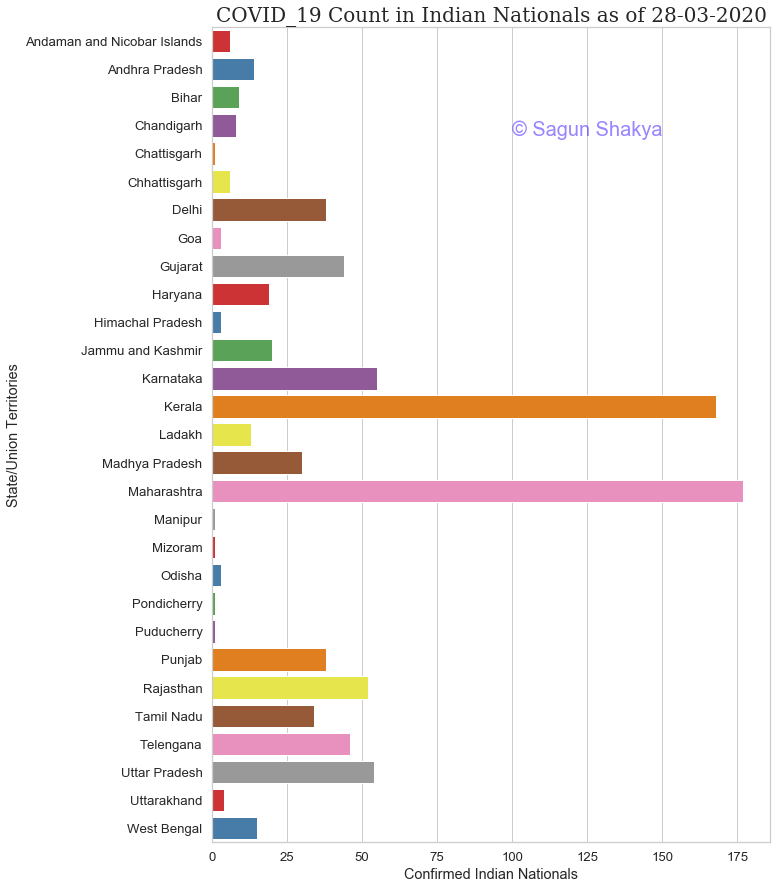

In [9]:
plt.figure(figsize = (10,15))
sns.set(style = 'whitegrid', font_scale = 1.2) 
sns.desaturate(color = 'red', prop = 0.5)

sns.barplot(x = df_mod['ConfirmedIndianNational'], y = df_mod.index.values, palette = 'Set1')

plt.ylabel('State/Union Territories')
plt.xlabel('Confirmed Indian Nationals')
plt.title('COVID_19 Count in Indian Nationals as of 28-03-2020', pad = 5, fontdict = {'fontsize': 20,
                                                                                        'family': 'serif'})
# matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
plt.text(150, 3.5, '\u00A9 Sagun Shakya',
         fontsize=20, color='#5633ff',
         ha='right', va='bottom', alpha=0.6)
#plt.savefig('ConfirmedIndianNational.png',dpi=300);
plt.show()

### COVID_19 Count in Foreign Nationals as of 28-03-2020.

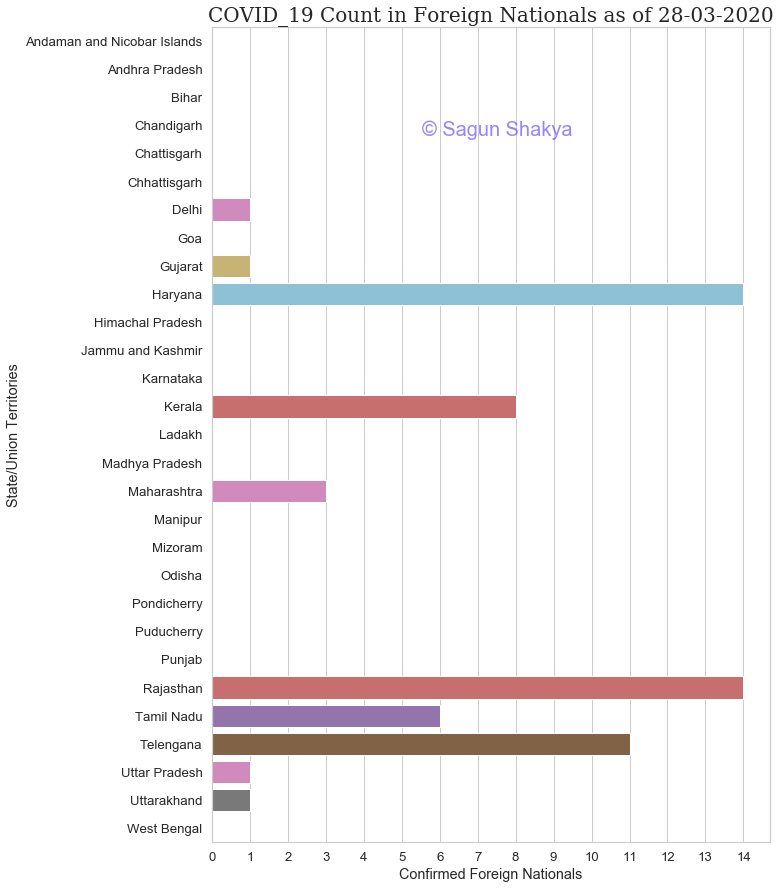

In [31]:
plt.figure(figsize = (10,15))
sns.set(style = 'whitegrid', font_scale = 1.2) 
sns.desaturate(color = 'red', prop = 0.5)

ax = sns.barplot(x = df_mod['ConfirmedForeignNational'], y = df_mod.index.values, palette = 'muted')


plt.xticks(np.arange(0, 15))
plt.ylabel('State/Union Territories')
plt.xlabel('Confirmed Foreign Nationals')
plt.title('COVID_19 Count in Foreign Nationals as of 28-03-2020', pad = 5, fontdict = {'fontsize': 20,
                                                                                        'family': 'serif'})
# matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
plt.text(9.5, 3.5, '\u00A9 Sagun Shakya',
         fontsize=20, color='#5633ff',
         ha='right', va='bottom', alpha=0.6)
#plt.savefig('ConfirmedIndianNational.png',dpi=300);
plt.show()

### COVID_19 Count in India as of 28-03-2020.

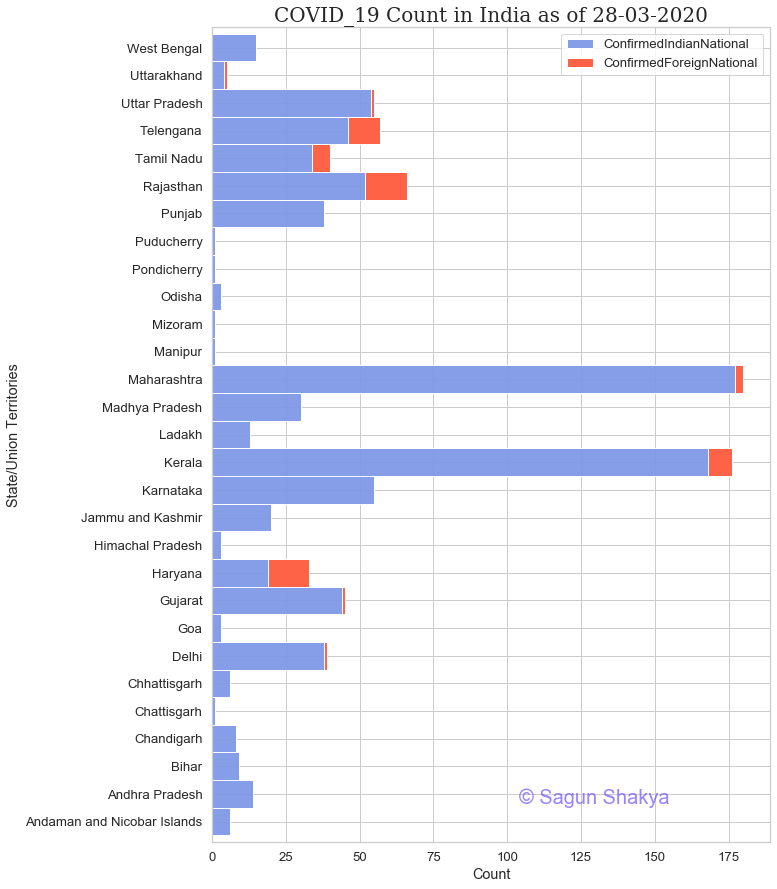

In [80]:
a = df_mod[['ConfirmedIndianNational','ConfirmedForeignNational']]

a.plot.barh(stacked = True, figsize = (10,15), width = 1, color = [(0.5,0.6,0.9,0.95), 'tomato'])
plt.xlabel('Count')
plt.ylabel('State/Union Territories')
plt.title('COVID_19 Count in India as of 28-03-2020', pad = 5, fontdict = {'fontsize': 20,
                                                                                        'family': 'serif'})
# matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
plt.text(155, 0.5, '\u00A9 Sagun Shakya',
         fontsize=20, color='#5633ff',
         ha='right', va='bottom', alpha=0.6)

plt.show()

### COVID_19 Cured Patients Count as of 28-03-2020.

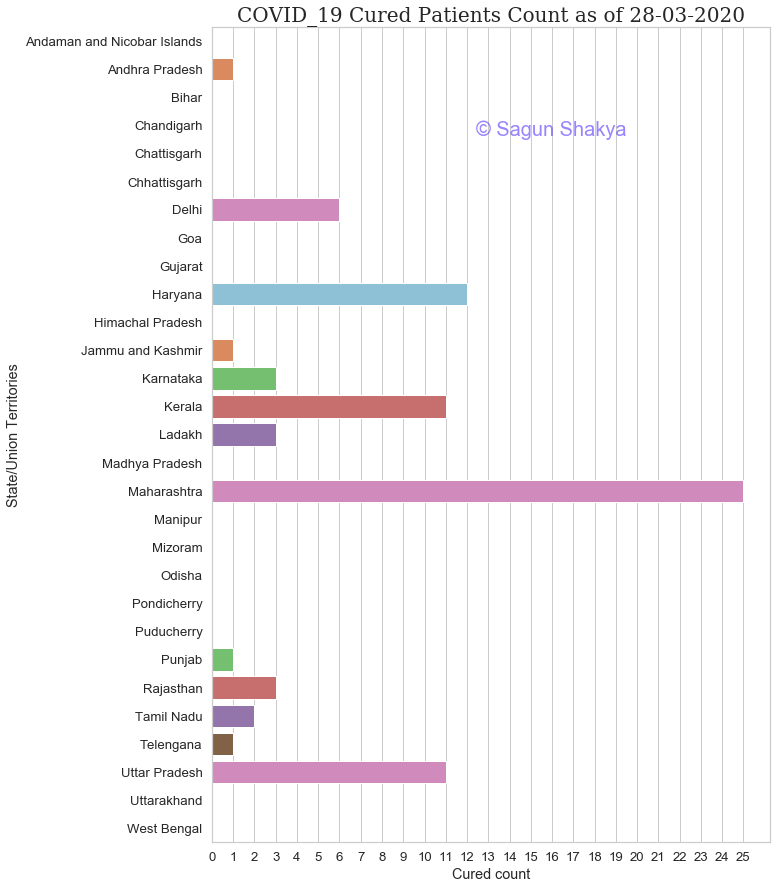

In [87]:
plt.figure(figsize = (10,15))
sns.set(style = 'whitegrid', font_scale = 1.2) 
sns.desaturate(color = 'red', prop = 0.5)

ax = sns.barplot(x = df_mod['Cured'], y = df_mod.index.values, palette = 'muted')


plt.xticks(np.arange(0, 26))
plt.ylabel('State/Union Territories')
plt.xlabel('Cured count')
plt.title('COVID_19 Cured Patients Count as of 28-03-2020', pad = 5, fontdict = {'fontsize': 20,
                                                                                        'family': 'serif'})
# matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
plt.text(19.5, 3.5, '\u00A9 Sagun Shakya',
         fontsize=20, color='#5633ff',
         ha='right', va='bottom', alpha=0.6)
#plt.savefig('ConfirmedIndianNational.png',dpi=300);
plt.show()

### COVID_19 Patients Death Count as of 28-03-2020.

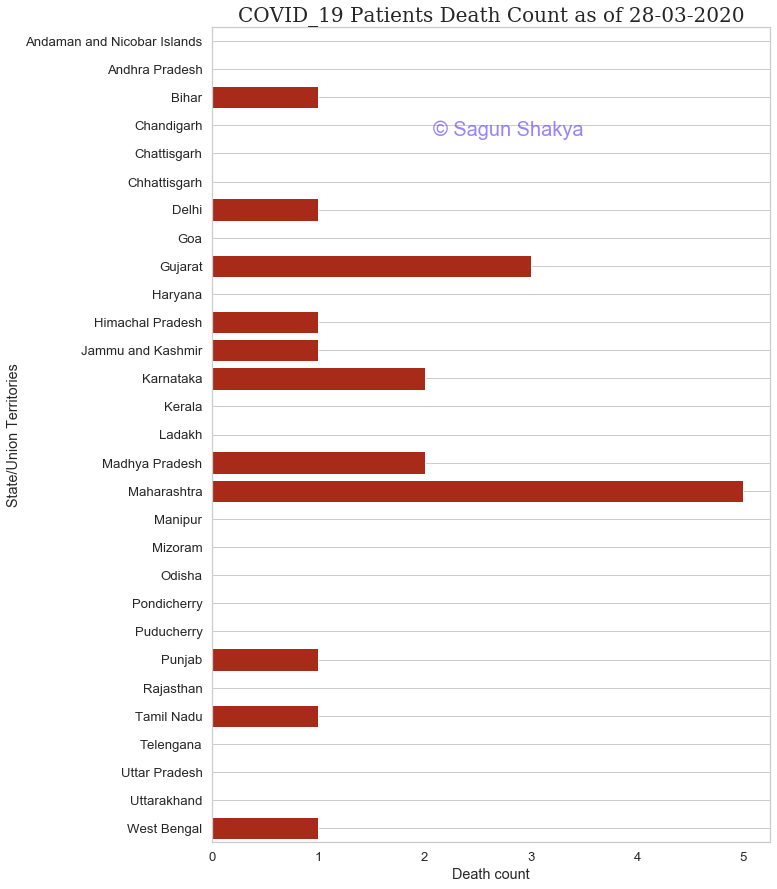

In [104]:
plt.figure(figsize = (10,15))
sns.set(style = 'whitegrid', font_scale = 1.2) 
sns.desaturate(color = 'red', prop = 0.5)

ax = sns.barplot(x = df_mod['Deaths'], y = df_mod.index.values, color = (0.75,0.1,0.01,0.1))


#plt.xticks(np.arange(0, 26))
plt.ylabel('State/Union Territories')
plt.xlabel('Death count')
plt.title('COVID_19 Patients Death Count as of 28-03-2020', pad = 5, fontdict = {'fontsize': 20,
                                                                                        'family': 'serif'})
# matplotlib.pyplot.text(x, y, s, fontdict=None, withdash=<deprecated parameter>, **kwargs)
plt.text(3.5, 3.5, '\u00A9 Sagun Shakya',
         fontsize=20, color='#5633ff',
         ha='right', va='bottom', alpha=0.6)
plt.grid()
#plt.savefig('ConfirmedIndianNational.png',dpi=300);
plt.show()

# The End.